# 第4章: 形態素解析

In [10]:
# 前処理
!mecab < ./in/neko.txt > ./out/neko.txt.mecab

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [2]:
# 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
def word_to_map(word):
    sf, oth = word.split('\t')
    othl = oth.split(',')
    return {'surface': sf, 'base': othl[6], 'pos': othl[0], 'pos1': othl[1]}

with open('./out/neko.txt.mecab', 'r') as f:
    txt = f.read()

res = []
for line in txt.split('EOS\n'):
    line = line.strip()
    if len(line) == 0 or (len(line) >= 2 and line[1] != '\t'):
        continue
    maps = []
    for word in line.split('\n'):
        maps.append(word_to_map(word))
    if len(maps) > 0:
        res.append(maps)
print(*res[1 : 5], sep='\n')

[{'surface': '何', 'base': '何', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'でも', 'base': 'でも', 'pos': '助詞', 'pos1': '副助詞'}, {'surface': '薄暗い', 'base': '薄暗い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': 'じめじめ', 'base': 'じめじめ', 'pos': '副詞', 'pos1': '一般'}, {'surface': 'し', 'base': 'する', 'pos': '動詞', 'pos1': '自立'}, {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}, {'surface': '所', 'base': '所', 'pos': '名詞', 'pos1': '非自立'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': 'ニャーニャー', 'base': '*', 'pos': '名詞', 'pos1': '一般'}, {'surface': '泣い', 'base': '泣く', 'pos': '動詞', 'pos1': '自立'}, {'surface': 'て', 'base': 'て', 'pos': '助詞', 'pos1': '接続助詞'}, {'surface': 'いた事', 'base': 'いた事', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'だけ', 'base': 'だけ', 'pos': '助詞', 'pos1': '副助詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '記憶', 'base': '記憶', 'pos': '名詞', 'pos1': 'サ変接続'}, {'surface': 'し', 'base': 'する', 'pos': '動詞', 'pos1': '自立'}, {'surface': 'て', 'base': 'て', '

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [18]:
print([word['surface'] for word in filter(lambda x: x['pos'] == '動詞', res[19])])

['おり', '持っ', 'いる']


## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [17]:
print([word['base'] for word in filter(lambda x: x['pos'] == '動詞', res[19])])

['おりる', '持つ', 'いる']


## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [22]:
for line in res:
    sz = len(line)
    for i in range(sz - 2):
        if line[i]['pos'] != '名詞':
            continue
        if line[i + 1]['surface'] != 'の':
            continue
        if line[i + 2]['pos'] != '名詞':
            continue
        print(''.join(line[i + j]['surface'] for j in range(3)))

掌の上
書生の顔
はずの顔
家の内
家のもの
皮膚の色
本の上
彼の膝
膝の上
玉のよう
親子の愛
軍人の家
代言の主人
今更のよう
主人の述懐
彼の友
金縁の眼鏡
主人の顔
内の想像
訳のもの
利の大家
彼の友
吾輩の輪廓
顔のあたり
顔の造作
他の猫
茶の木の根
西側の杉
垣のそば
他の庭
純粋の黒
中の大王
ここの教師
教師の家
車屋の黒
車屋の方
うちの主人
車屋の猫
どこの国
己の後
黒の比較
彼の鼻
鼻の先
彼の答
鼠の百
掃除の時
反対の結果
今日の会
日の日記
喜悦の体
主人の情
下のよう
化の皮
別の本
彼の光沢
髯の張り
耳の立ち
尻尾の垂れ
吾輩の御蔭
年賀の客
酒の相手
どっちの方角
木綿の紋付
羽織の袖口
車屋の黒
失恋のため
胃弱のせい
所の令嬢
御存じの方
前のこと
皿の上
両人の皿
盛の砂糖
壺の中
匙の砂糖
壺の中
櫃の上
餅の切れ
最後の一
椀の中
質のもの
独言のよう
対句のよう
ほかの病気
本当のところ
主人の前
机の上
池の端
端の待合
待合の前
裾模様の春着
丹の角
無用のもの
彼の説
胃病の源
胃の働き
何等の功
年来の胃弱
限りの方法
餅の上皮
すべての動物
底の様子
すべての動物
事物の適
餅の肉
供の唱歌
餅の中
餅の魔
三の真理
ところのもの
餅の魔
時のよう
垣の隙
去年の暮
あなたのうち
欣羨の意
供のよう
あなたの所
祐筆の妹
かさんの甥
甥の娘
かさんの甥
甥の娘
理詰の虚言
黒の性質
吾輩の有名
子の向う
罵詈の言語
子の何とか
彼の足
足の下
鮭の骨
自分のため
本当の御馳走
木綿の紋付
紋付の羽織
小倉の袴
体の男
客の前
方の事
膝の上
吾輩の頭
ボイの方
鴨のロース
小牛のチャップ
私の方
何の気
客の謝罪
トチメンボーの材料
横浜の十
当分の間
私の方
承知の通り
方面の研究
去年の暮
文章の類
古人の作
同人の創作
古人の作
白楽天の琵琶
行のよう
蕪村の春風
曲の種類
近松の心中
主人の顔色
時代の人
顔の横手
娼家の下婢
茶屋の下女
部屋の助役
仲居の性格
君のほか
家の気
何の役割
入会の上
的の主人
員の名簿
紫の風呂敷
版の帳面
署名の上
主人の膝
膝の前
念の体
賛成の意
知名の学者
無上の光栄
返事の勢
新年の御慶
大兄の消極
未曾有の新年
程の多忙
一刻のひま
トチメンボーの

## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [14]:
# [length, [words]]
def longest_noun_junction(sentence):
    max_length, max_words = 0, []
    words = []
    cnt = 0
    for word in sentence:
        if word['pos'] == '名詞':
            cnt += 1
            words.append(word['surface'])
        else:
            if max_length < cnt:
                max_length = cnt
                max_words = [words]
            elif max_length == cnt:
                max_words.append(words[:])
            words = []
            cnt = 0
    if max_length == 0:
        max_words = []
    return [max_length, max_words]

max_length, max_words = 0, []
for sentence in res:
    length, words = longest_noun_junction(sentence)
    if max_length < length:
        max_length = length
        max_words = words
    elif max_length == length:
        max_words.append(words)

print("max_length:", max_length)
for i in max_words:
    print(''.join(i))

max_length: 10
明治三十八年何月何日戸締り


## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [45]:
word_freq = {}
for sentence in res:
    for word in sentence:
        if word['pos'] != '名詞':
            continue
        base = word['base']
        if base in word_freq:
            word_freq[base] += 1
        else:
            word_freq[base] = 1

word_freq_sorted = sorted(word_freq.items(), key=lambda x: -x[1])
for base, quan in word_freq_sorted[:100]:
    print('%4d回 : %s' % (quan, base))

824回 : *
 585回 : の
 476回 : 君
 430回 : 事
 372回 : ん
 318回 : もの
 276回 : 何
 249回 : 人
 248回 : よう
 238回 : 主人
 219回 : 一
 169回 : 僕
 156回 : それ
 138回 : さん
 124回 : 二
 123回 : 三
 114回 : 先生
 113回 : 寒月
 110回 : 時
 107回 : 方
 105回 : そう
 105回 : 十
 101回 : これ
 101回 : ところ
  99回 : 今
  96回 : 顔
  96回 : 鼻
  95回 : 気
  91回 : 私
  77回 : 猫
  75回 : 細君
  74回 : 上
  74回 : 中
  69回 : 彼
  68回 : 子
  66回 : 誰
  66回 : 前
  61回 : 訳
  57回 : 吾輩
  56回 : 昔
  56回 : どこ
  56回 : 日
  55回 : 東風
  55回 : 沙弥
  54回 : 人間
  53回 : 声
  53回 : うち
  53回 : 頭
  53回 : 男
  52回 : 女
  52回 : 年
  50回 : 所
  49回 : 家
  49回 : あなた
  46回 : 者
  45回 : もん
  45回 : 五
  45回 : 仙
  44回 : 独
  43回 : 心
  42回 : 四
  42回 : 六
  42回 : 妙
  41回 : 大変
  41回 : 金
  40回 : 今度
  40回 : さ
  40回 : だい
  39回 : 本
  39回 : 通り
  39回 : 金田
  38回 : 自分
  38回 : 話
  38回 : 学校
  37回 : 眼
  37回 : 馬鹿
  36回 : 例
  36回 : 間
  35回 : ため
  35回 : なに
  35回 : ヴァイオリン
  34回 : あれ
  33回 : 的
  32回 : いや
  32回 : 候
  32回 : 右
  31回 : 今日
  31回 : 大
  31回 : 手
  31回 : 口
  31回 : 苦
  30回 : 黒
  30回 : 奥さん
  29回 : 内
  29回 : 鼠
  29回 : 奴


## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

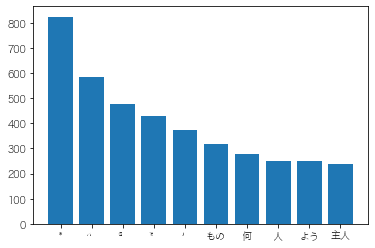

In [46]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

topN = 10
x = list(range(topN))
y = [tup[1] for tup in word_freq_sorted[:topN]]
labels = [tup[0] for tup in word_freq_sorted[:topN]]

plt.rcParams['font.family'] = 'Hiragino Sans'
plt.bar(x, y, tick_label=labels)
plt.show()

In [42]:
# フォント検索
import matplotlib.font_manager
print(*[f.name for f in matplotlib.font_manager.fontManager.ttflist], sep='\n')

STIXSizeFourSym
cmtt10
DejaVu Sans Mono
DejaVu Serif
DejaVu Sans Mono
STIXSizeFiveSym
cmex10
DejaVu Serif
cmss10
cmsy10
DejaVu Sans Mono
STIXNonUnicode
STIXNonUnicode
STIXSizeThreeSym
STIXSizeOneSym
DejaVu Sans
DejaVu Serif
STIXNonUnicode
STIXGeneral
STIXSizeTwoSym
STIXSizeThreeSym
DejaVu Serif
cmr10
DejaVu Sans
STIXSizeTwoSym
DejaVu Sans
cmb10
STIXGeneral
DejaVu Sans Mono
DejaVu Serif Display
DejaVu Sans Display
cmmi10
STIXNonUnicode
STIXSizeOneSym
STIXSizeFourSym
STIXGeneral
DejaVu Sans
STIXGeneral
Noto Sans Kayah Li
Noto Sans Ol Chiki
STIXSizeFourSym
Apple Braille
Microsoft Sans Serif
Courier New
InaiMathi
STIXGeneral
Courier New
.New York
.New York
Kohinoor Devanagari
Noto Sans Egyptian Hieroglyphs
Sathu
Kohinoor Gujarati
Herculanum
Apple Braille
Noto Sans Inscriptional Parthian
Apple Braille
.SF NS Display Condensed
Athelas
Hiragino Maru Gothic Pro
DecoType Naskh
STIXSizeThreeSym
PingFang HK
Seravek
Noto Sans Thaana
Mshtakan
STIXIntegralsSm
STIXGeneral
Tahoma
ITF Devanagari
Al Bay

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [50]:
word_freq = {}
for sentence in res:
    if not any(w['surface'] == '猫' for w in sentence):
        continue
    for word in sentence:
        if word['pos'] != '名詞':
            continue
        if word['surface'] == '猫':
            continue
        base = word['base']
        if base in word_freq:
            word_freq[base] += 1
        else:
            word_freq[base] = 1

word_with_cat_freq_sorted = sorted(word_freq.items(), key=lambda x: -x[1])

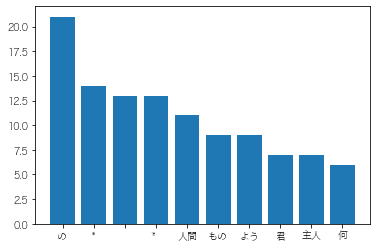

In [51]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

topN = 10
x = list(range(topN))
y = [tup[1] for tup in word_with_cat_freq_sorted[:topN]]
labels = [tup[0] for tup in word_with_cat_freq_sorted[:topN]]

plt.rcParams['font.family'] = 'Hiragino Sans'
plt.bar(x, y, tick_label=labels)
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [58]:
word_freq = {}
for sentence in res:
    for word in sentence:
        if word['pos'] != '名詞':
            continue
        base = word['base']
        if base in word_freq:
            word_freq[base] += 1
        else:
            word_freq[base] = 1

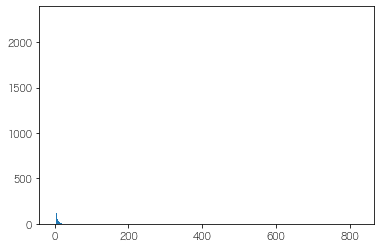

In [59]:
mx = max(word_freq.values())
x = list(range(mx + 1))
hist = [0] * (mx + 1)
for k in word_freq:
    hist[word_freq[k]] += 1

plt.bar(x, hist)
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [61]:
word_freq = {}
for sentence in res:
    for word in sentence:
        if word['pos'] != '名詞':
            continue
        base = word['base']
        if base in word_freq:
            word_freq[base] += 1
        else:
            word_freq[base] = 1

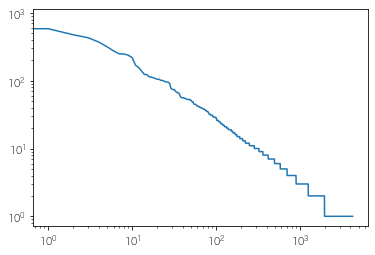

In [63]:
y = sorted([word_freq[w] for w in word_freq], reverse=True)
x = list(range(len(y)))

ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(x, y)
plt.show()